# BY:- SYED ANFAS AHMED

The National Health and Nutrition Examination Survey (NHANES) collects significant health information, including body measurements for both adult males and females. Our research focuses on understanding Body Mass Indices (BMIs) in these populations by collecting information such as height, weight, and different circumferences. Using numpy, we examine patterns, distributions, and interactions in the data, generating BMIs and building histograms to visualise their distribution. Box-and-whisker plots compare central tendencies and variations, whereas numerical aggregates and scatterplot matrices reveal correlations and trends. We also standardise the male dataset to investigate the effects of standardisation. The purpose is to highlight changes in body composition between adult males and females, which will guide future study directions, utilising just numpy matrices and avoiding pandas data frames.

In [ ]:
import numpy as np
from scipy.stats import skew
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, iqr

In this step I am loading the given source two files which contains the male and female data from the github user.

In [ ]:
import matplotlib.pyplot as plt
dframe1 = np.genfromtxt("https://raw.githubusercontent.com/gagolews/teaching-data/" +
                   "master/marek/nhanes_adult_female_bmx_2020.csv", delimiter=",")[1:,:] # pd.read_csv
dframe2 = np.genfromtxt("https://raw.githubusercontent.com/gagolews/teaching-data/" +
                   "master/marek/nhanes_adult_male_bmx_2020.csv", delimiter=",")[1:,:] # pd.read_csv

Now lets display the data frame as Dataframe 1 and Dataframe 2

In [ ]:
dframe1

array([[ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4, ...,  31.8, 106.2,  92. ],
       ...,
       [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
       [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
       [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]])

In [ ]:
dframe1_col = [
    "weight (kg)",
    "standing height (cm)",
    "upper arm len. (cm)",
    "upper leg len. (cm)",
    "arm circ. (cm)",
    "hip circ. (cm)",
    "waist circ. (cm)"
]


In [ ]:
dframe2_col = [
    "weight (kg)",
    "standing height (cm)",
    "upper arm len. (cm)",
    "upper leg len. (cm)",
    "arm circ. (cm)",
    "hip circ. (cm)",
    "waist circ. (cm)"
]


In [ ]:
dframe1

array([[ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4, ...,  31.8, 106.2,  92. ],
       ...,
       [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
       [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
       [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]])

In the next step I am going to calculate the Body Mass Index for the dataframe 1 and dataframe 2.

In [ ]:
# Extract weights and heights from dframe1
weights = dframe1[:, 0]
heights = dframe1[:, 1]

# Calculate BMIs
BMI_F = weights / ((heights / 100) ** 2)

# Append the calculated BMI column to the original array
dframe1 = np.column_stack((dframe1, BMI_F))


In [ ]:
# Extract weights and heights from dframe2
weights = dframe2[:, 0]
heights = dframe2[:, 1]

# Calculate BMIs using the formula: BMI = weight / (height^2)
BMI_M = weights / ((heights / 100) ** 2)

# Append the calculated BMI column to the original array
dframe2 = np.column_stack((dframe2, BMI_M))


In the next step I am adding a new column called BMI in dframe1 and dataframe 2

In [ ]:
new_col = np.array(['BMI'])
dframe1_col =np.concatenate((dframe1_col, new_col))
dframe2_col = np.concatenate((dframe2_col, new_col))

The purpose of this line of code is to visualize and compare the BMI distributions for female and male participants in the dataset using two histograms.

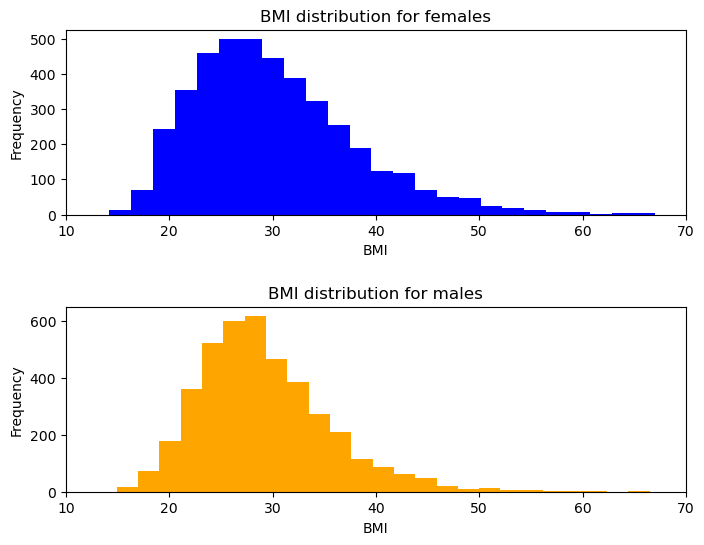

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Setting bin count for histograms
num_bins = 25

# Plot histogram for female participants
ax1.hist(BMI_F, bins=num_bins, color='blue')
ax1.set_xlim(10, 70)
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency")
ax1.set_title("BMI distribution for females")

# Plot histogram for male participants
ax2.hist(BMI_M, bins=num_bins, color='orange')
ax2.set_xlim(10, 70)
ax2.set_xlabel("BMI")
ax2.set_ylabel("Frequency")
ax2.set_title("BMI distribution for males")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


Now lets plot a scatterplot between BMI and Genders.

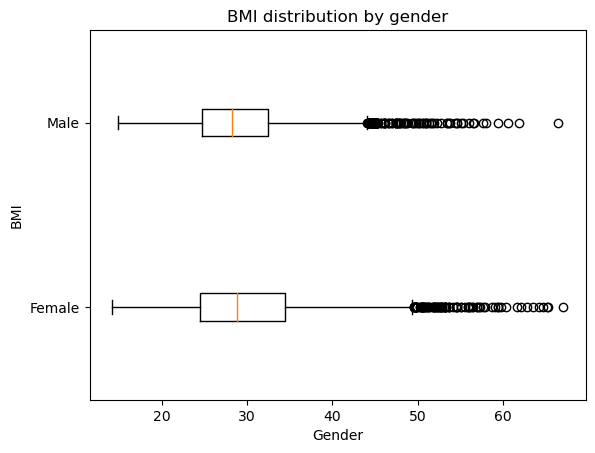

In [ ]:
# Prepare data
BMI_list = [BMI_F, BMI_M]
labels = ['Female', 'Male']

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the boxplot
ax.boxplot(BMI_list, labels=labels, vert=False)

# Set axis labels and title
ax.set_xlabel("Gender")
ax.set_ylabel("BMI")
ax.set_title("BMI distribution by gender")

# Show the plot
plt.show()


Calculating the basic numerical aggregates for both the genders

In [ ]:
# Compute basic numerical aggregates of female BMIs
female_stats = [np.mean(BMI_F), np.median(BMI_F), np.std(BMI_F),
                np.min(BMI_F), np.max(BMI_F), skew(BMI_F),
                iqr(BMI_F)]

# Compute basic numerical aggregates of male BMIs
male_stats = [np.mean(BMI_M), np.median(BMI_M), np.std(BMI_M),
              np.min(BMI_M), np.max(BMI_M), skew(BMI_M),
              iqr(BMI_M)]

# Define the labels for the statistics
labels = ['Mean', 'Median', 'Std', 'Min', 'Max', 'Skew', 'IQR']

# Print the results
print("Basic numerical aggregates of female and male BMIs:")
print('\nBMI\t   Female\t   Male')
for i in range(len(labels)):
    print(f"{labels[i]}: {female_stats[i]:.2f}\t {male_stats[i]:.2f}")


Basic numerical aggregates of female and male BMIs:

BMI	   Female	   Male
Mean: 30.10	 29.14
Median: 28.89	 28.27
Std: 7.76	 6.31
Min: 14.20	 14.91
Max: 67.04	 66.50
Skew: 0.92	 0.97
IQR: 10.01	 7.73


I tried to note down the charecteristics of two distributions and given below as,
(a) The skewness values of the distributions can be used to compare them. Positive skewness indicates a tail that extends to higher BMI values, whereas negative skewness indicates a tail that extends to lower BMI values.
(b)The central tendency is revealed by comparing the mean and median values for females and males. If their values are near, the distributions are relatively symmetric. If they differ significantly, it indicates the possibility of outliers or skewness.
(c)The interquartile range (IQR) represents the range between the 25th and 75th percentiles. A greater IQR indicates a wider range of BMI readings within the middle 50% of the distribution.

The code below is to create pair plot, to visualize the relationships between variables in a dataset

In [ ]:
def pairplot(X, labels, bins=21, alpha=0.1):
    """
    Draws a scatter plot matrix, given:
    * X - data matrix,
    * labels - list of column names
    """
    assert X.shape[1] == len(labels)

    k = X.shape[1]
    fig, axes = plt.subplots(nrows=k, ncols=k, sharex="col", sharey="row",
        figsize=(plt.rcParams["figure.figsize"][0], )*2)
    for i in range(k):
        for j in range(k):
            ax = axes[i, j]
            if i == j:  # diagonal
                ax.text(0.5, 0.5, labels[i], transform=ax.transAxes,
                    ha="center", va="center", size="x-small")
            else:
                ax.plot(X[:, j], X[:, i], ".", color="black", alpha=alpha)


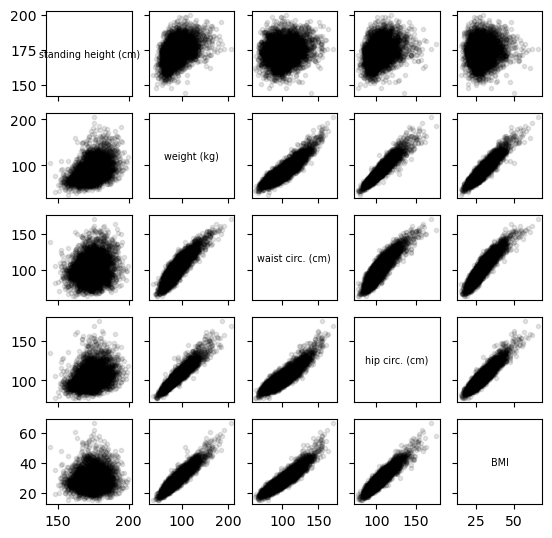

In [ ]:
which = [1, 0, 6, 5,7]
pairplot(dframe2[:, which], dframe2_col[which])
plt.show()

In [ ]:
def corrheatmap(R, labels):
    """
    Draws a correlation heat map, given:
    * R - matrix of correlation coefficients between all pairs of variables,
    * labels - list of column names
    """
    assert R.shape[0] == R.shape[1] and R.shape[0] == len(labels)

    plt.imshow(R, cmap="RdBu", vmin=-1, vmax=1)
    plt.colorbar()

    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, f"{R[i, j]:.2f}", ha="center", va="center",
                     color="white" if np.abs(R[i, j]) >= 0.5 else "black")

    plt.xticks(range(len(labels)), labels, rotation=30)
    plt.yticks(range(len(labels)), labels)

    plt.grid(False)


This code's primary function is to compute and display correlation matrices (Pearson and Spearman) as heatmaps. Higher absolute values indicate stronger correlations in the heatmaps, which show pairwise correlation coefficients between variables, and the text annotations provide correlation values for each heatmap cell.

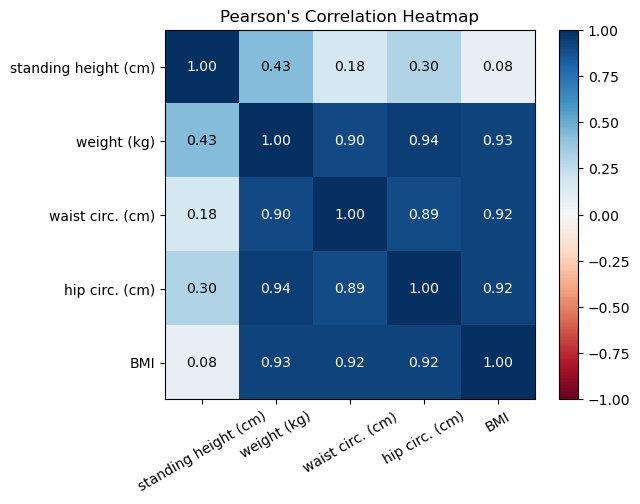

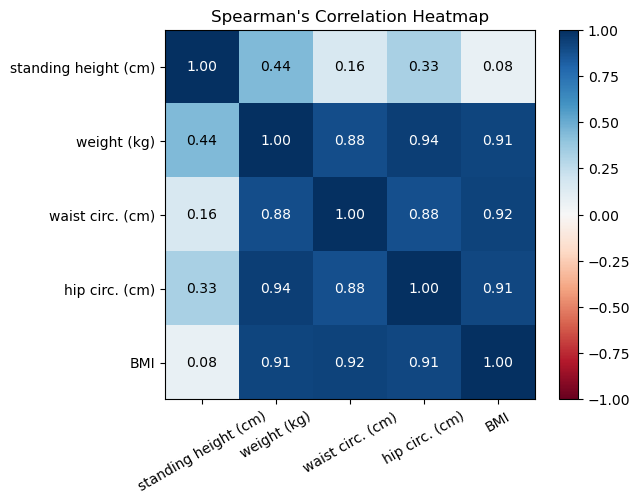

In [ ]:
order = [1, 0, 6, 5, 7]

# Computing correlation coefficients
pearson_corr = np.corrcoef(dframe2, rowvar=False)
spearman_corr = scipy.stats.spearmanr(dframe2)[0]

# Plotting Pearson's correlation heatmap
plt.imshow(pearson_corr[np.ix_(order, order)], cmap="RdBu", vmin=-1, vmax=1)
plt.colorbar()

for i in range(len(order)):
    for j in range(len(order)):
        plt.text(j, i, f"{pearson_corr[order[i], order[j]]:.2f}", ha="center", va="center",
                 color="white" if np.abs(pearson_corr[order[i], order[j]]) >= 0.5 else "black")

plt.xticks(range(len(order)), dframe2_col[order], rotation=30)
plt.yticks(range(len(order)), dframe2_col[order])

plt.title("Pearson's Correlation Heatmap")
plt.grid(False)
plt.show()

# Plotting Spearman's correlation heatmap
plt.imshow(spearman_corr[np.ix_(order, order)], cmap="RdBu", vmin=-1, vmax=1)
plt.colorbar()

for i in range(len(order)):
    for j in range(len(order)):
        plt.text(j, i, f"{spearman_corr[order[i], order[j]]:.2f}", ha="center", va="center",
                 color="white" if np.abs(spearman_corr[order[i], order[j]]) >= 0.5 else "black")

plt.xticks(range(len(order)), dframe2_col[order], rotation=30)
plt.yticks(range(len(order)), dframe2_col[order])

plt.title("Spearman's Correlation Heatmap")
plt.grid(False)
plt.show()


According to the plots above, BMI, Hip circumference, and Weight of Females are strongly correlated to each other, and the diagonal value is 1 indicating that the variable is correlated to itself. If we look to pairplot, the BMI and Hip circumference have a high positive degree of linear correlation, and the waist circumference and weight are also highly correlated positively.

In the next step I am creating a new matrix called z female and I am going to do the same operations which are i did above, like computing and plotting spearman and pearson correlation function.

In [ ]:
zmale = (dframe2 - np.mean(dframe2, axis=0)) / np.std(dframe2, axis=0)


In [ ]:
zmale.shape


(4081, 8)

In [ ]:
zmale_col = np.array([
    "weight (kg)",
    "standing height (cm)",   # we know `heights` from the previous chapters
    "upper arm len. (cm)",
    "upper leg len. (cm)",
    "arm circ. (cm)",
    "hip circ. (cm)",
    "waist circ. (cm)",
    "BMI"])

In [ ]:
zmale_col = np.append(dframe2_col, "BMI")

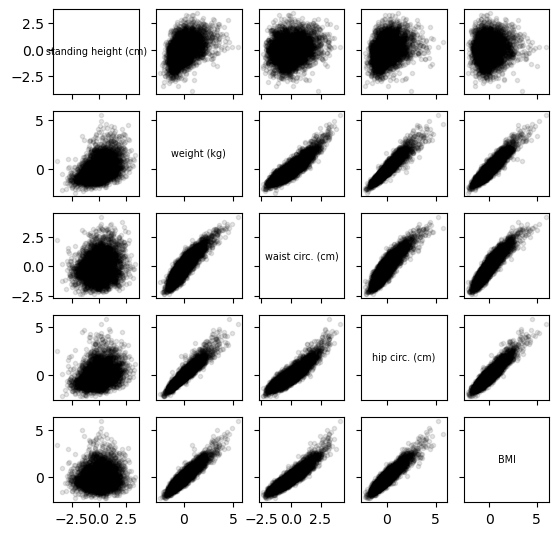

In [ ]:
which = [1, 0, 6, 5, 7]
pairplot(zmale[:, which], zmale_col[which])
plt.show()

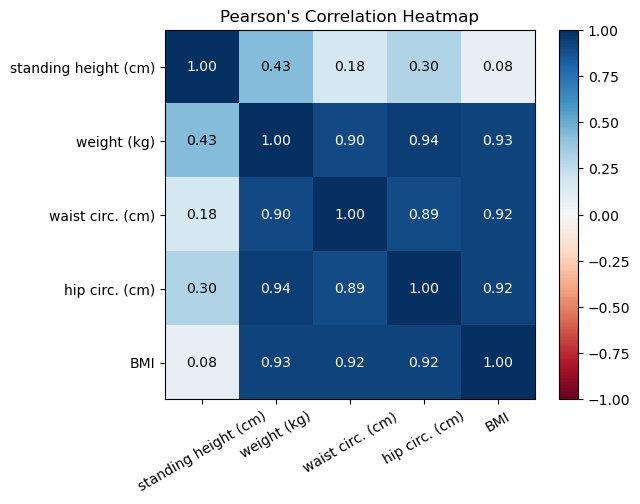

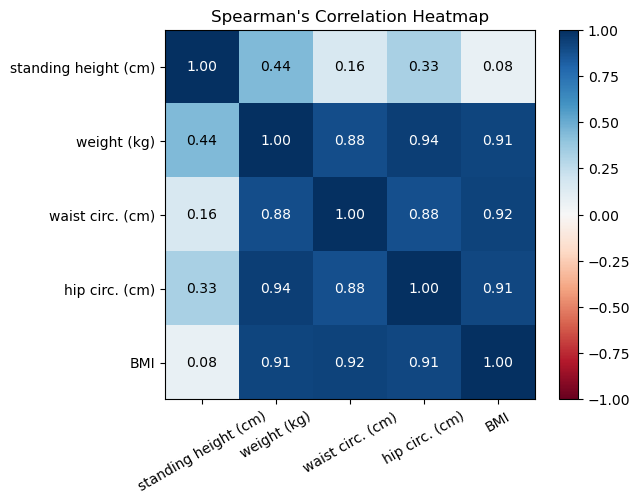

In [ ]:
pearson_corr = np.corrcoef(zmale, rowvar=False)

# in this step i am going to compute spearman correlation
spearman_corr = np.corrcoef(scipy.stats.rankdata(zmale, axis = 0), rowvar=False)

order = [1, 0, 6, 5, 7]

# in this step i am going to plot pearson correlation heatmap
corrheatmap(pearson_corr[np.ix_(order, order)], zmale_col[order])
plt.title("Pearson's Correlation Heatmap")
plt.show()

# in this step i am going to compute spearman correlation heatmap
corrheatmap(spearman_corr[np.ix_(order, order)], zmale_col[order])
plt.title("Spearman's Correlation Heatmap")
plt.show()